### Bibliotecas Instaladas

In [85]:
import pandas as pd #Pandas para carregamento do conjunto de dados
import seaborn as sns
import numpy as np
%matplotlib inline

### Data Loading

In [86]:
#Aqui vamos ler uma arquivo de Excel para começarmos a tratar os dados e as variáveis
data = pd.read_excel(r"D:\OCEAN\Dataset\Rubelmar\treinamento_cordoes.xlsx" , index_col = 0)


### Data Visualization

In [87]:
#Mostrar primerias 5 colunas
data.head()

,Et,Tipo,Furo,Gas,Diam,u,v,t_arco,u.1,i,v.1,tempo_t,ciclo_trabalho,interrupções,energia_total
cp,,,,,,,,,,,,,,,
2,fc,1°,Não,Ar,Maior,4,9,7.7786,15.529282,256.051236,7.722713,8.7230,0.891734,27,27562.852404
2,fc,2°,Sim,Ar,Maior,4,9,6.7134,16.111797,237.984484,7.426446,7.1168,0.943317,5,23767.347607
3,fc,1°,Não,Ar,Maior,5,5,7.4672,23.069799,135.090920,1.412267,17.6674,0.422654,34,23359.194766
3,fc,2°,Não,Ar,Maior,5,5,7.3786,23.322624,127.537741,1.406391,18.1418,0.406718,29,22239.599199
4,fc,1°,Sim,Ar,Maior,5,9,5.4818,20.072319,238.922962,7.576412,7.2680,0.754238,16,25026.993814


In [88]:
#mostrar últimas 5 linhas
data.tail()

,Et,Tipo,Furo,Gas,Diam,u,v,t_arco,u.1,i,v.1,tempo_t,ciclo_trabalho,interrupções,energia_total
cp,,,,,,,,,,,,,,,
22,ex,2°,Sim,Ar,Maior,5,7,5.0824,21.263082,181.566372,4.762359,5.4470,0.933064,2,19697.616418
23,ex,1°,Não,Ar,Menor,4,7,9.8296,19.333369,105.046360,4.500873,14.1524,0.694554,173,19891.163571
23,ex,2°,Não,Ar,Menor,4,7,9.0706,19.717527,98.726511,4.384289,16.5522,0.548000,78,17852.863558
24,ex,1°,Não,Ar,Menor,5,7,6.0450,23.022218,115.534215,4.375145,12.5830,0.480410,77,16591.749844
24,ex,2°,Não,Ar,Menor,5,7,5.7988,23.171592,109.538104,4.487649,12.5018,0.463837,86,15371.833738


In [89]:
# verificar o formato do dataset
data.shape

(42, 15)

Plotar um Gráfico do comportamento de certas variáveis em funções de outras variáveis
https://seaborn.pydata.org/tutorial/regression.html

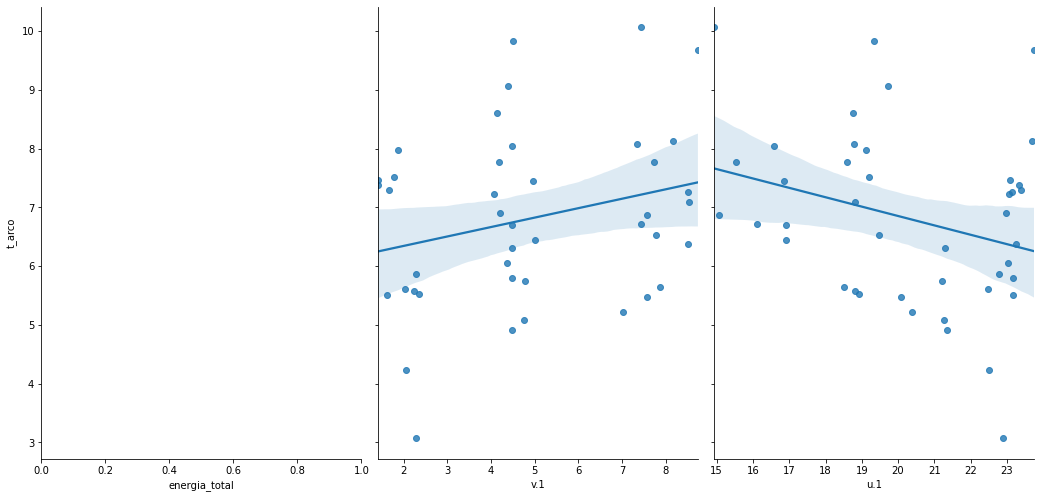

In [90]:
#Aqui temos uma regressão kind = reg
#Bug - os dados do primeiro gráfico não estão funcionando como deveriam
sns.pairplot(data, x_vars=['energia_total', 'v.1','u.1'], y_vars='t_arco', height=7, aspect=0.7, kind='reg')

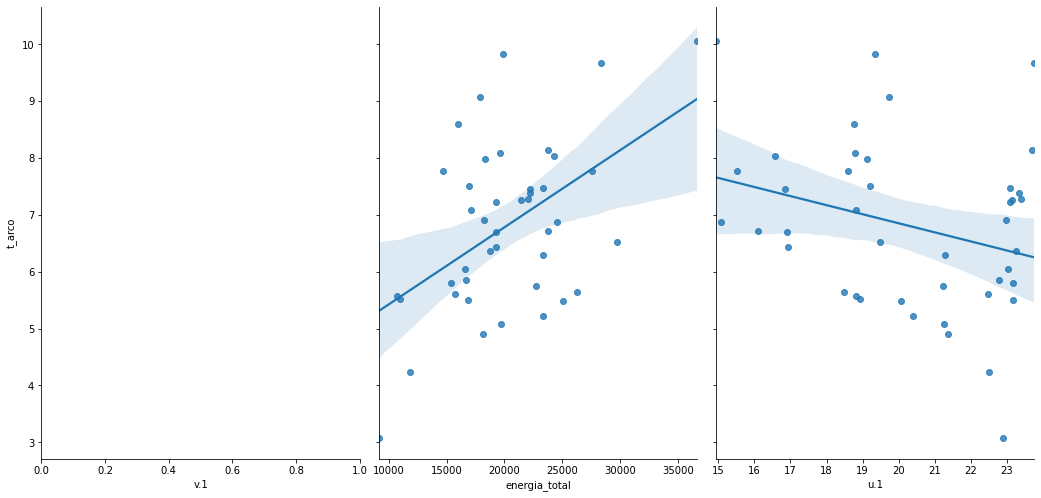

In [91]:
sns.pairplot(data, x_vars=[ 'v.1','energia_total','u.1'], y_vars='t_arco', height=7, aspect=0.7, kind='reg')

### Escolhendo Features

In [92]:
# Selecionar as features
feature_cols = ['v.1','u.1', 'u', 'v', 'energia_total', 't_arco']

# Selecionar essas features Dataset
X = data[feature_cols]

# Equivalente
X = data[['v.1','u.1', 'u', 'v', 'energia_total', 't_arco']]

# Verificar o dataset
X.head()

,v.1,u.1,u,v,energia_total,t_arco
cp,,,,,,
2,7.722713,15.529282,4,9,27562.852404,7.7786
2,7.426446,16.111797,4,9,23767.347607,6.7134
3,1.412267,23.069799,5,5,23359.194766,7.4672
3,1.406391,23.322624,5,5,22239.599199,7.3786
4,7.576412,20.072319,5,9,25026.993814,5.4818


In [93]:
# verificar o tipo e a forma de X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(42, 6)


In [94]:
# Selecionar uma coluna do Dataframe
y = data[['v.1','u.1']]

# print the first 5 values
y.head()

,v.1,u.1
cp,,
2,7.722713,15.529282
2,7.426446,16.111797
3,1.412267,23.069799
3,1.406391,23.322624
4,7.576412,20.072319


### Divisão do Dataset

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [96]:
#A DIUVISÃO PADRÃSO É 3/4 para treinamento e 1/4 para teste
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31, 6)
(31, 2)
(11, 6)
(11, 2)


### Preparando o Algoritmo das Redes Neurais

In [97]:
from sklearn.inspection import plot_partial_dependence
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X, y = make_friedman1()
est1 = LinearRegression().fit(X, y)
est2 = RandomForestRegressor().fit(X, y)
disp1 = plot_partial_dependence(est1, X,
                                [1, 2])  
disp2 = plot_partial_dependence(est2, X, [1, 2],
                                ax=disp1.axes_) 

In [98]:
# Modelo Instantâneo
from sklearn.linear_model import LinearRegression

# Iniciação Instantânea
linreg = LinearRegression()

# Fit model
linreg.fit(X_train, y_train)

LinearRegression()

In [99]:
# Printar os Coeficientes
print(linreg.intercept_)
print(linreg.coef_)

[ 4.44089210e-14 -1.84741111e-12]
[[ 1.00000000e+00 -4.82396268e-18 -3.69407435e-16  4.72001533e-16
  -2.27988114e-18 -1.11742268e-16]
 [-1.12176671e-13  1.00000000e+00 -7.20299398e-13 -7.77927125e-15
   1.21554351e-16 -1.30889196e-16]]


In [100]:
# Juntar os nomes com os coeficientes
list(zip(feature_cols, linreg.coef_))

[('v.1',
  array([ 1.00000000e+00, -4.82396268e-18, -3.69407435e-16,  4.72001533e-16,
         -2.27988114e-18, -1.11742268e-16])),
 ('u.1',
  array([-1.12176671e-13,  1.00000000e+00, -7.20299398e-13, -7.77927125e-15,
          1.21554351e-16, -1.30889196e-16]))]

In [101]:
# Fazer as predições de acordo com o dataset
y_pred = linreg.predict(X_test)
print(y_pred)

[[ 1.40639123 23.32262377]
 [ 1.41226719 23.06979938]
 [ 1.61244929 23.17600943]
 [ 4.38428893 19.71752693]
 [ 8.51751996 23.2419648 ]
 [ 4.20840268 22.96822123]
 [ 1.77357508 19.2093568 ]
 [ 5.0061771  16.9205817 ]
 [ 4.48820166 16.89765322]
 [ 1.65113031 23.37411573]
 [ 7.56642567 15.07127756]]


In [102]:
print(y_test)

         v.1        u.1
cp                     
3   1.406391  23.322624
3   1.412267  23.069799
15  1.612449  23.176009
23  4.384289  19.717527
12  8.517520  23.241965
18  4.208403  22.968221
13  1.773575  19.209357
21  5.006177  16.920582
19  4.488202  16.897653
15  1.651130  23.374116
14  7.566426  15.071278


In [103]:
# define true and predicted response values
true = y_test
pred = y_pred

#### Mean Absolute Error (MAE)

In [104]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

2.0027414070579075e-13


#### Mean Square Erro (MSE)

In [105]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

1.346680026823503e-25


#### Root Mean Squared Error (RMSE)

In [106]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

3.669713921852088e-13
